# Checking soilcores files

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
df = pd.read_excel("data_info/MNHT_paths_v1.xlsx")

In [3]:
# remove the rows where the root_path is nan and reset the index
df = df.loc[~df["root_path"].isna()].reset_index(drop=True)
df

,label ID,root_path,filename
0,N1002,MU\SOIL64_8_10_20,SOIL_FRIT_8_10_20Series_003_Bone 0.5 SCAN 1.2
1,N1003,MU\SOIL64_4_8_5_20_3,SOIL_FRIT_8_5_20_3Series_003_Bone 0.5 SCAN 7
2,N1006,MU\SOIL64_2_8_5_20_1,SOIL_FRIT_8_5_20_1Series_004_Bone 0.5 SCAN 4
3,N1008,MU\SOIL64_3_8_5_20_2,SOIL_FRIT_8_5_20_2Series_003_Bone 0.5 SCAN 5
4,N1009,MU\SOIL64_8_5_20,SOIL_FRIT_8_5_20Series_004_Bone 0.5 SCAN 2
...,...,...,...
170,N3310,MU\DICOM_07\0000\002,NaN
171,N3311,MU\SOIL64_8_19_20,SOIL_FRIT_8_19_20Series_002_Bone 0.5 SCAN 1
172,N3316,MU\SOIL_8_10_20_2,SOIL_8_10_20_2Series_004_Bone 0.5 SCAN 6
173,N3317,MU\SOIL64_2_8_7_20_1,SOIL_FRIT_8_7_20_1Series_004_Bone 0.5 SCAN 4


In [4]:
ini_root_path = ".."

all_found = True

# df_row = df.iloc[0]
for index, df_row in df.iterrows():
    labelID = df_row["label ID"]
    root_path = df_row["root_path"]
    file_name = df_row["filename"]

    if not pd.isna(file_name):
        dicom_path = os.path.join(ini_root_path, root_path, file_name + ".dcm")
        labels_path = os.path.join(ini_root_path, root_path, "labels", file_name + "_corelabels" + ".nii.gz")
        descriptions_path = os.path.join(ini_root_path, root_path, "labels", file_name + "_descriptions" + ".txt")
    else:
        dicom_path = None
        labels_dir = os.path.join(ini_root_path, root_path, "labels")
        prefix = os.path.basename(root_path) + "_"  # e.g. 002_corelabels.nii.gz
        labels_path = os.path.join(labels_dir, prefix + "corelabels.nii.gz")
        descriptions_path = os.path.join(labels_dir, prefix + "descriptions.txt")

    # Load descriptions (ITK-SNAP format: IDX  R G B A  VIS MSH  "LABEL")
    label_descriptions = {}
    if os.path.isfile(descriptions_path):
        with open(descriptions_path, "r") as f:
            for line in f:
                line = line.strip()
                if not line or line.startswith("#"):
                    continue
                parts = line.split()
                if not parts:
                    continue
                try:
                    idx = int(parts[0])
                    # Label is the last quoted string
                    start = line.find('"')
                    end = line.rfind('"')
                    if start != -1 and end != -1 and end > start:
                        label_descriptions[idx] = line[start + 1 : end]
                    else:
                        label_descriptions[idx] = parts[-1]
                except (ValueError, IndexError):
                    pass

    if not labelID in label_descriptions.values():
        print(f"Label ID {labelID} not found in descriptions")
        all_found = False

if all_found:
    print("All labels found in descriptions")

All labels found in descriptions


# Load WinRHIZO data

In [2]:
import pandas as pd

# check sheet names
df = pd.read_excel("data_info/MNHT root morphology_20210702_checkingcores.xlsx", sheet_name=None)

In [3]:
df12bins = df["root morphology- 12bins"]

In [4]:
df12bins.columns

Index(['label ID', 'CROSS', 'LINE', 'PLANT_ID', 'Rhizomes', 'Weight (g DW)',
       'Length(cm)', 'ProjArea(cm2)', 'SurfArea(cm2)', 'AvgDiam(mm)',
       '0<.L.<=0.2', '0.2<.L.<=0.4', '0.4<.L.<=0.6', '0.6<.L.<=0.8',
       '0.8<.L.<=1', '1<.L.<=1.5', '1.5<.L.<=2', '2<.L.<=2.5', '2.5<.L.<=3',
       '3<.L.<=3.5', '3.5<.L.<=4', '.L.>4.0000000'],
      dtype='str')

In [5]:
L00 = df12bins["0<.L.<=0.2"]+df12bins["0.2<.L.<=0.4"]+df12bins["0.4<.L.<=0.6"]+\
    +df12bins["0.6<.L.<=0.8"]+df12bins["0.8<.L.<=1"]+df12bins["1<.L.<=1.5"]+\
    df12bins["1.5<.L.<=2"]+df12bins["2<.L.<=2.5"]+df12bins["2.5<.L.<=3"]+\
    df12bins["3<.L.<=3.5"]+df12bins["3.5<.L.<=4"]+df12bins[".L.>4.0000000"]
L10 = df12bins["1<.L.<=1.5"]+\
    df12bins["1.5<.L.<=2"]+df12bins["2<.L.<=2.5"]+df12bins["2.5<.L.<=3"]+\
    df12bins["3<.L.<=3.5"]+df12bins["3.5<.L.<=4"]+df12bins[".L.>4.0000000"]
L20 = df12bins["2<.L.<=2.5"]+df12bins["2.5<.L.<=3"]+\
    df12bins["3<.L.<=3.5"]+df12bins["3.5<.L.<=4"]+df12bins[".L.>4.0000000"]
L30 = df12bins["3<.L.<=3.5"]+df12bins["3.5<.L.<=4"]+df12bins[".L.>4.0000000"]
L40 = df12bins[".L.>4.0000000"]

dfsel = pd.DataFrame({
    "label ID": df12bins["label ID"],
    "Length(cm)": df12bins["Length(cm)"],
    'ProjArea(cm2)': df12bins['ProjArea(cm2)'],
    'SurfArea(cm2)': df12bins['SurfArea(cm2)'],
    'AvgDiam(mm)': df12bins['AvgDiam(mm)'],
    "L00": L00,
    "L10": L10,
    "L20": L20,
    "L30": L30,
    "L40": L40
})
dfsel.head()

,label ID,Length(cm),ProjArea(cm2),SurfArea(cm2),AvgDiam(mm),L00,L10,L20,L30,L40
0,N1001,3797.3749,231.6935,727.8866,0.619387,3796.5368,475.4734,24.0071,1.7365,0.0000
1,N1002,2145.3141,127.7677,401.3938,0.589867,1249.5995,421.1587,62.8071,7.6579,0.2279
2,N1003,3070.1213,123.4252,387.7514,0.405325,1766.1485,253.8436,46.7013,2.0037,0.0000
3,N1006,2593.1142,164.7268,517.5046,0.602133,1849.5062,562.9311,104.1158,0.6381,0.0000
4,N1007,3805.0056,300.6121,944.4006,0.797675,2794.4701,1348.6283,101.6396,2.0508,0.0000


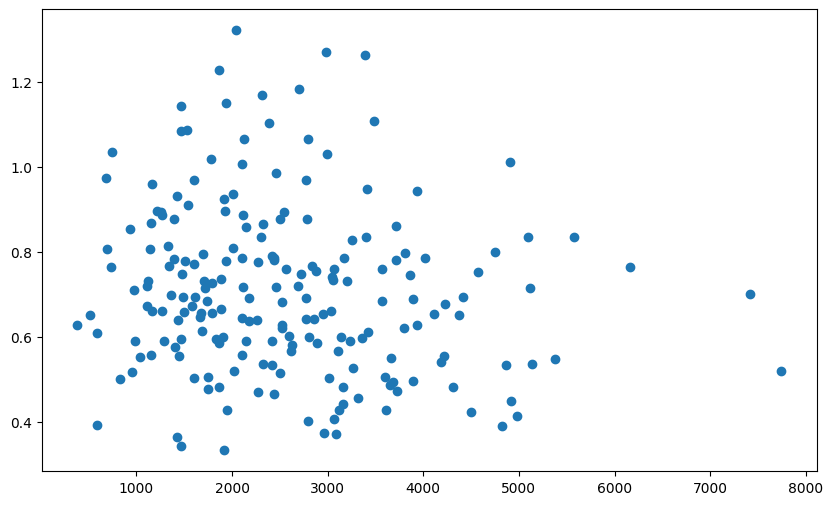

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dfsel["Length(cm)"], dfsel["AvgDiam(mm)"], label="Total length")

In [18]:
import glob
import os

listcoresfullpath = glob.glob(os.path.join("data","cores","*.nii.gz"))
listcores = [corefile.split(os.sep)[-1].split(".")[0] for corefile in listcoresfullpath]
dfsel.loc[dfsel["label ID"].isin(listcores)]


,label ID,Length(cm),ProjArea(cm2),SurfArea(cm2),AvgDiam(mm),L00,L10,L20,L30,L40
1,N1002,2145.3141,127.7677,401.3938,0.589867,1249.5995,421.1587,62.8071,7.6579,0.2279
2,N1003,3070.1213,123.4252,387.7514,0.405325,1766.1485,253.8436,46.7013,2.0037,0.0000
3,N1006,2593.1142,164.7268,517.5046,0.602133,1849.5062,562.9311,104.1158,0.6381,0.0000
5,N1008,4860.4815,296.3589,931.0394,0.532275,3806.9867,888.8293,161.1988,1.8429,0.1474
6,N1009,1748.8858,86.7061,272.3952,0.477450,1046.3628,252.6572,32.7752,0.2557,0.0000
...,...,...,...,...,...,...,...,...,...,...
196,N3310,4980.4968,231.9297,728.6287,0.413650,3021.6425,654.8421,27.1695,0.2537,0.0000
197,N3311,3727.8261,205.7956,646.5260,0.472967,2065.5667,733.7538,25.7312,0.2077,0.0000
198,N3316,589.0921,23.1230,72.6431,0.392500,376.7285,27.1250,8.1993,0.0000,0.0000
199,N3317,3033.9284,202.1240,634.9913,0.659767,1751.1016,704.4606,133.5206,26.0661,5.6767


In [19]:
dfsel.to_csv("data_info/MNHT_rootmorphology_GT.csv", index=False)